In [1]:
#1.1 Install SciPy Libraries

# There are 5 key libraries that you will need to install. Below is a list of the Python SciPy libraries required

# scipy
# numpy
# matplotlib
# pandas
# sklearn

In [3]:
#1.2 Start Python and Check Versions

#Open a command line and start the python interpreter:

#type: Python


# Check the versions of libraries
 
# Python version
import sys
print('Python: {}'.format(sys.version))
# scipy
import scipy
print('scipy: {}'.format(scipy.__version__))
# numpy
import numpy
print('numpy: {}'.format(numpy.__version__))
# matplotlib
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))
# pandas
import pandas
print('pandas: {}'.format(pandas.__version__))
# scikit-learn
import sklearn
print('sklearn: {}'.format(sklearn.__version__))

Python: 3.8.8 (default, Apr 13 2021, 15:08:03) [MSC v.1916 64 bit (AMD64)]
scipy: 1.6.2
numpy: 1.20.1
matplotlib: 3.3.4
pandas: 1.2.4
sklearn: 0.24.1


In [ ]:
#2. Load The Data

#In this step we are going to load the iris data from CSV file URL.

In [4]:
#2.1 Import libraries


# Load libraries
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [6]:
#2.2 Load Dataset

# Load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = read_csv(url, names=names)

In [7]:
#3. Summarize the Dataset
# Now it is time to take a look at the data.

# In this step we are going to take a look at the data a few different ways:

#3.1. Dimensions of the dataset.

# shape
print(dataset.shape)

#3.2 Peek at the data itself.

# head
print(dataset.head(20))

#3.3 Statistical summary of all attributes.

# descriptions
print(dataset.describe())

#3.4 Breakdown of the data by the class variable.

# class distribution
print(dataset.groupby('class').size())

(150, 5)
    sepal-length  sepal-width  petal-length  petal-width        class
0            5.1          3.5           1.4          0.2  Iris-setosa
1            4.9          3.0           1.4          0.2  Iris-setosa
2            4.7          3.2           1.3          0.2  Iris-setosa
3            4.6          3.1           1.5          0.2  Iris-setosa
4            5.0          3.6           1.4          0.2  Iris-setosa
5            5.4          3.9           1.7          0.4  Iris-setosa
6            4.6          3.4           1.4          0.3  Iris-setosa
7            5.0          3.4           1.5          0.2  Iris-setosa
8            4.4          2.9           1.4          0.2  Iris-setosa
9            4.9          3.1           1.5          0.1  Iris-setosa
10           5.4          3.7           1.5          0.2  Iris-setosa
11           4.8          3.4           1.6          0.2  Iris-setosa
12           4.8          3.0           1.4          0.1  Iris-setosa
13         

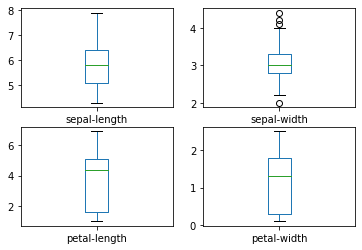

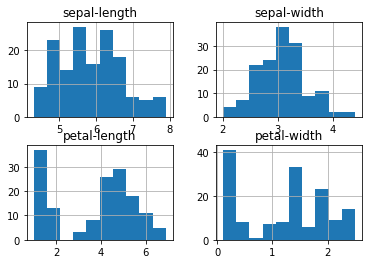

In [8]:
#4. Data Visualization

#4.1 Univariate Plots

# box and whisker plots
dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
pyplot.show()

# histograms
dataset.hist()
pyplot.show()

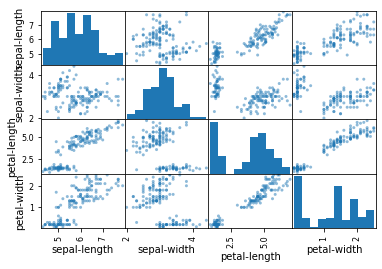

In [9]:
#4.2 Multivariate Plots

# scatter plot matrix
scatter_matrix(dataset)
pyplot.show()

In [10]:
#5. Evaluate Some Algorithms

#5.1 Create a Validation Dataset

# Split-out validation dataset
array = dataset.values
X = array[:,0:4]
y = array[:,4]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1)

In [11]:
#5.2 Test Harness

# will use stratified 10-fold cross validation to estimate model accuracy.

#This will split our dataset into 10 parts, train on 9 and test on 1 and repeat for all combinations of train-test splits.

#We set the random seed via the random_state argument to a fixed number to ensure that each algorithm is evaluated on the
#same splits of the training dataset.

In [12]:
#5.3 Build Models

#Let’s test 6 different algorithms:

# Logistic Regression (LR)
# Linear Discriminant Analysis (LDA)
# K-Nearest Neighbors (KNN).
# Classification and Regression Trees (CART).
# Gaussian Naive Bayes (NB).
# Support Vector Machines (SVM).

# This is a good mixture of simple linear (LR and LDA), nonlinear (KNN, CART, NB and SVM) algorithms

In [13]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.941667 (0.065085)
LDA: 0.975000 (0.038188)
KNN: 0.958333 (0.041667)
CART: 0.941667 (0.053359)
NB: 0.950000 (0.055277)
SVM: 0.983333 (0.033333)


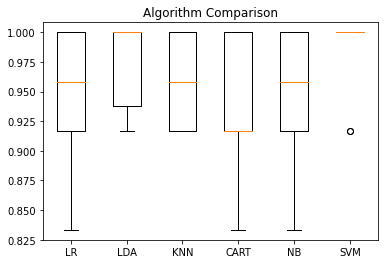

In [17]:
#5.4 Select Best Model

#check which model has high accuracy from the above results

# Compare Algorithms
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()

#Here, SVC has high accuracy

In [18]:
#6. Make Predictions

# We must choose an algorithm to use to make predictions.

#6.1 Make Predictions

# Make predictions on validation dataset
model = SVC(gamma='auto')
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

In [19]:
#6.2 Evaluate Predictions

# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9666666666666667
[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

       accuracy                           0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30

